In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/Train.csv")

In [3]:
df.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


We need at leas 10 entries for the time series, so we drop all groups with less than 13 entries

In [4]:
# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])
# Create empty lists to store train and test DataFrames
train_dfs = []
test_dfs = []
# Creating subsets of locations
location_groups = df.groupby('Place_ID')
# Filter out groups that have fewer than 13 unique dates
filtered_groups = {
    location: sub_df for location, sub_df in location_groups 
    if sub_df['Date'].nunique() >= 13
}
# Debug: Print number of filtered groups
print(f"Number of filtered groups (locations with >=13 unique dates): {len(filtered_groups)}")
# Iterate through each filtered group
for location, sub_df in filtered_groups.items():
    # Sort each subset DataFrame by the 'Date' column in ascending order
    sub_df = sub_df.sort_values(by='Date', ascending=True)
    # Debug: Check the number of rows in the sorted sub_df
    print(f"Location: {location}, Number of rows: {len(sub_df)}")
    # Select the last three rows for the test set
    test_df = sub_df.tail(3)
    # Select the remaining rows for the train set
    train_df = sub_df.iloc[:-3]
    # Debug: Verify the number of rows in train and test sets for this location
    print(f"Location: {location}, Train Rows: {len(train_df)}, Test Rows: {len(test_df)}")
    # Append the split dataframes to their respective lists
    train_dfs.append(train_df)
    test_dfs.append(test_df)
# Concatenate all the train and test DataFrames into separate DataFrames
df_train_split = pd.concat(train_dfs, ignore_index=True)
df_test_split = pd.concat(test_dfs, ignore_index=True)
# Display or use the resulting DataFrames
print("Training set:")
print(df_train_split.head())  # Display the first few rows for verification
print("\nTest set:")
print(df_test_split.head())   # Display the first few rows for verification
# Check the number of rows in the test set for each location to verify correctness
print("\nNumber of rows per Place_ID in the test set:")
print(df_test_split['Place_ID'].value_counts())




Number of filtered groups (locations with >=13 unique dates): 337
Location: 010Q650, Number of rows: 94
Location: 010Q650, Train Rows: 91, Test Rows: 3
Location: 05EC30X, Number of rows: 90
Location: 05EC30X, Train Rows: 87, Test Rows: 3
Location: 0DPWHX8, Number of rows: 94
Location: 0DPWHX8, Train Rows: 91, Test Rows: 3
Location: 0GBXTHY, Number of rows: 94
Location: 0GBXTHY, Train Rows: 91, Test Rows: 3
Location: 0HYPV1N, Number of rows: 94
Location: 0HYPV1N, Train Rows: 91, Test Rows: 3
Location: 0I2XREH, Number of rows: 65
Location: 0I2XREH, Train Rows: 62, Test Rows: 3
Location: 0KV6RJ1, Number of rows: 94
Location: 0KV6RJ1, Train Rows: 91, Test Rows: 3
Location: 0MGEY68, Number of rows: 94
Location: 0MGEY68, Train Rows: 91, Test Rows: 3
Location: 0O9R6AD, Number of rows: 92
Location: 0O9R6AD, Train Rows: 89, Test Rows: 3
Location: 0PP73FZ, Number of rows: 94
Location: 0PP73FZ, Train Rows: 91, Test Rows: 3
Location: 0RYZQUU, Number of rows: 91
Location: 0RYZQUU, Train Rows: 88, T

In [5]:
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


In [6]:


#  Sort the DataFrame by 'Place_ID' and 'Date' to ensure correct ordering
df_train_split = df_train_split.sort_values(by=['Place_ID', 'Date'])

#  Group the data by 'Place_ID' and apply the time series shift
df_train_split['lag1'] = df_train_split.groupby('Place_ID')['target'].shift(1)

#  Drop rows where 'log1' is NaN (the first row in each group)
df_train_split = df_train_split.dropna(subset=['lag1'])

#  Reset the index if needed (optional)
df_train_split = df_train_split.reset_index(drop=True)

# Display the final DataFrame
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,lag1
0,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,0.00839,22.546533,3.33043,-1.188108,0.000076,0.000197,-1.082553,0.01836,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.0152,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.00015,0.433957,0.00005,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,38.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

spearson correlation num - best 5 features - dont take lag 1

pearson categorical

location is a categorical one

check if the features are independent ?  (multicolinearity problem)

In [8]:
# Step 1: Exclude 'Place_ID' and 'Date' and select only numeric columns
numeric_df = df_train_split.drop(columns=['Place_ID', 'Date']).select_dtypes(include=['float64', 'int64'])

# Step 2: Pearson Correlation (linear relationship)
pearson_corr = numeric_df.corr(method='pearson')

# Order by absolute value of the correlation with target
pearson_corr_sorted = pearson_corr['target'].abs().sort_values(ascending=False)
print("Pearson Correlation with Target (Ordered by Absolute Value):")
print(pearson_corr_sorted)

# Step 3: Spearman Correlation (monotonic relationship)
spearman_corr = numeric_df.corr(method='spearman')

# Order by absolute value of the correlation with target
spearman_corr_sorted = spearman_corr['target'].abs().sort_values(ascending=False)
print("\nSpearman Correlation with Target (Ordered by Absolute Value):")
print(spearman_corr_sorted)

Pearson Correlation with Target (Ordered by Absolute Value):
target                                                 1.000000
lag1                                                   0.846698
target_min                                             0.818921
target_max                                             0.630196
L3_CO_CO_column_number_density                         0.401326
L3_HCHO_tropospheric_HCHO_column_number_density        0.350505
L3_HCHO_HCHO_slant_column_number_density               0.324131
L3_NO2_NO2_slant_column_number_density                 0.321926
L3_AER_AI_sensor_altitude                              0.309995
L3_NO2_NO2_column_number_density                       0.308377
L3_CO_sensor_altitude                                  0.302647
L3_NO2_tropospheric_NO2_column_number_density          0.295284
L3_AER_AI_solar_azimuth_angle                          0.193152
L3_O3_solar_azimuth_angle                              0.187866
L3_CLOUD_solar_azimuth_angle               

In [9]:
# Exclude 'target', 'log1', 'lag1', 'target_min', 'target_max'
excluded_features = ['target', 'lag1', 'target_min', 'target_max']

# Filter the Pearson correlations excluding the specified features
filtered_features = pearson_corr_sorted.drop(excluded_features)

# Get the top 5 remaining features by Pearson correlation
top_5_filtered_features = filtered_features.index[:12]  # Get the next top 5 features
print("Top 7 features for linear regression model (excluding specified):", top_5_filtered_features)

Top 7 features for linear regression model (excluding specified): Index(['L3_CO_CO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_HCHO_slant_column_number_density',
       'L3_NO2_NO2_slant_column_number_density', 'L3_AER_AI_sensor_altitude',
       'L3_NO2_NO2_column_number_density', 'L3_CO_sensor_altitude',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_AER_AI_solar_azimuth_angle', 'L3_O3_solar_azimuth_angle',
       'L3_CLOUD_solar_azimuth_angle', 'target_variance'],
      dtype='object')


FINDINGS PEARSON (TOP 7)

L3_CO_CO_column_number_density                         0.393221
L3_HCHO_tropospheric_HCHO_column_number_density        0.349700
L3_HCHO_HCHO_slant_column_number_density               0.325961
L3_AER_AI_sensor_altitude                              0.316445
L3_NO2_NO2_slant_column_number_density                 0.312890
L3_CO_sensor_altitude                                  0.311183
L3_NO2_NO2_column_number_density                       0.302320

FINDING SPEARSON (TOP 7)

L3_AER_AI_sensor_altitude                              0.387518
L3_HCHO_tropospheric_HCHO_column_number_density        0.387201
L3_CO_sensor_altitude                                  0.378116
L3_NO2_tropospheric_NO2_column_number_density          0.375973
L3_HCHO_HCHO_slant_column_number_density               0.370443
L3_CO_CO_column_number_density                         0.348571
L3_NO2_NO2_column_number_density                       0.334212



Scenario 1:
Pearson = 0.85, Spearman = 0.88: Both show a strong correlation, likely a linear relationship.

Scenario 2:
Pearson = 0.30, Spearman = 0.80: The relationship is likely non-linear but still monotonic (curved trend).

Scenario 3:
Pearson = 0.80, Spearman = 0.40: There may be outliers or rank inconsistencies affecting Spearman's result.

1. L3_AER_AI_sensor_altitude  = Spearson 0.387518 Pearson 0.316445
2. L3_HCHO_tropospheric_HCHO_column_number_density = SP 0.387201 Pearson 0.349700
3. L3_CO_sensor_altitude = SP 0.378116 > P 0.311183
4. L3_HCHO_HCHO_slant_column_number_density    = SP 0.370443 > 0.325961
5. L3_CO_CO_column_number_density = SP 0.348571 < P 0.393221

Based on your provided list, after excluding the specified features, the next top features are:

L3_CO_CO_column_number_density: Pearson = 0.393
L3_HCHO_tropospheric_HCHO_column_number_density: Pearson = 0.350
L3_HCHO_HCHO_slant_column_number_density: Pearson = 0.326
L3_AER_AI_sensor_altitude: Pearson = 0.316
L3_NO2_NO2_slant_column_number_density: Pearson = 0.313

These features have strong linear correlations with the target and can be good predictors for your regression model.

In [10]:
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,lag1
0,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,0.00839,22.546533,3.33043,-1.188108,0.000076,0.000197,-1.082553,0.01836,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.0152,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.00015,0.433957,0.00005,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,38.0


Correlation Matrix:
                                                 L3_CO_CO_column_number_density   
L3_CO_CO_column_number_density                                         1.000000  \
L3_HCHO_tropospheric_HCHO_column_number_density                        0.278641   
L3_HCHO_HCHO_slant_column_number_density                               0.349252   
L3_AER_AI_sensor_altitude                                             -0.400094   
L3_NO2_NO2_slant_column_number_density                                 0.190112   

                                                 L3_HCHO_tropospheric_HCHO_column_number_density   
L3_CO_CO_column_number_density                                                          0.278641  \
L3_HCHO_tropospheric_HCHO_column_number_density                                         1.000000   
L3_HCHO_HCHO_slant_column_number_density                                                0.894169   
L3_AER_AI_sensor_altitude                                                        

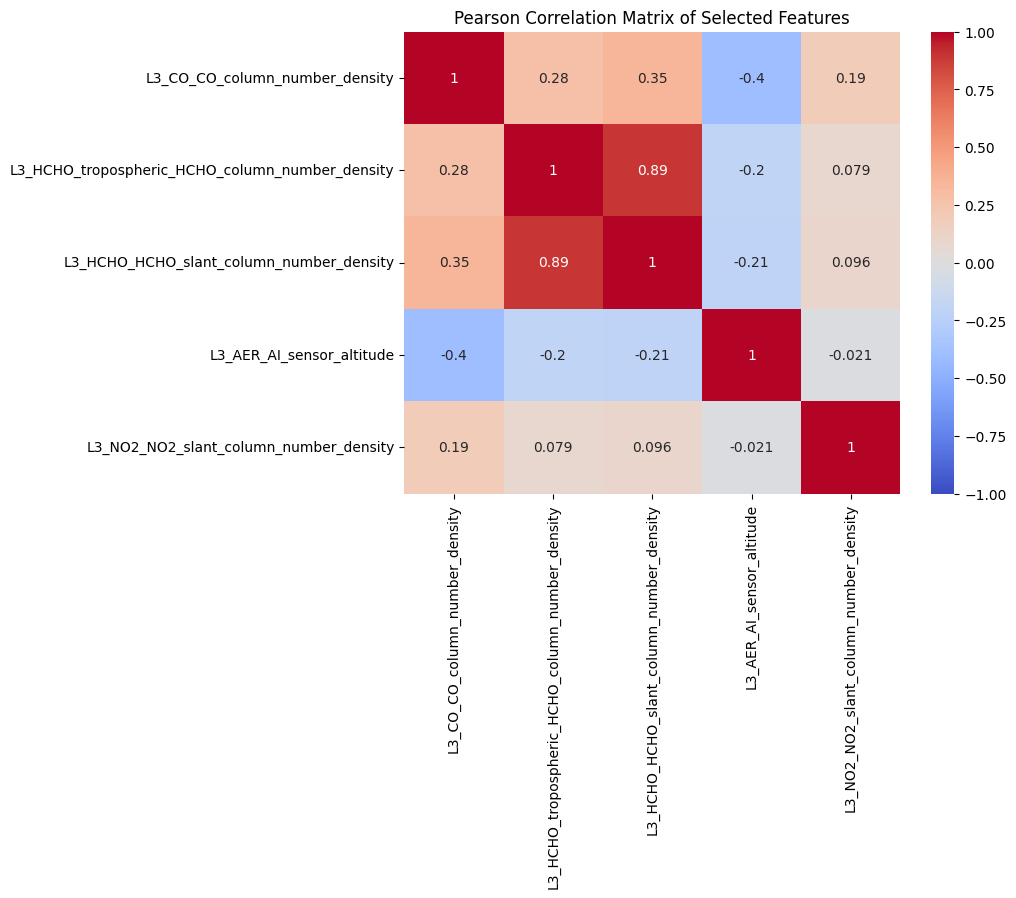

In [11]:
# Select the 5 features for testing independence
features_to_test = df_train_split[['L3_CO_CO_column_number_density', 
                                   'L3_HCHO_tropospheric_HCHO_column_number_density',
                                   'L3_HCHO_HCHO_slant_column_number_density', 
                                   'L3_AER_AI_sensor_altitude', 
                                   'L3_NO2_NO2_slant_column_number_density']]

# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = features_to_test.corr(method='pearson')

# Step 2: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix of Selected Features')
plt.show()

Key Insights:
L3_HCHO_tropospheric_HCHO_column_number_density and L3_HCHO_HCHO_slant_column_number_density have a high correlation of 0.90.
This indicates strong multicollinearity between these two features. These features are not independent, and including both in a linear regression model may cause multicollinearity problems. You might want to consider removing one of them.

DROP, column number density and exchange with our top 6 list L3_AER_AI_solar_azimuth_angle

Correlation Matrix:
                                                 L3_CO_CO_column_number_density   
L3_CO_CO_column_number_density                                         1.000000  \
L3_HCHO_tropospheric_HCHO_column_number_density                        0.278641   
L3_NO2_NO2_column_number_density                                       0.205418   
L3_O3_O3_column_number_density                                         0.011341   
u_component_of_wind_10m_above_ground                                  -0.065458   

                                                 L3_HCHO_tropospheric_HCHO_column_number_density   
L3_CO_CO_column_number_density                                                          0.278641  \
L3_HCHO_tropospheric_HCHO_column_number_density                                         1.000000   
L3_NO2_NO2_column_number_density                                                        0.116398   
L3_O3_O3_column_number_density                                                   

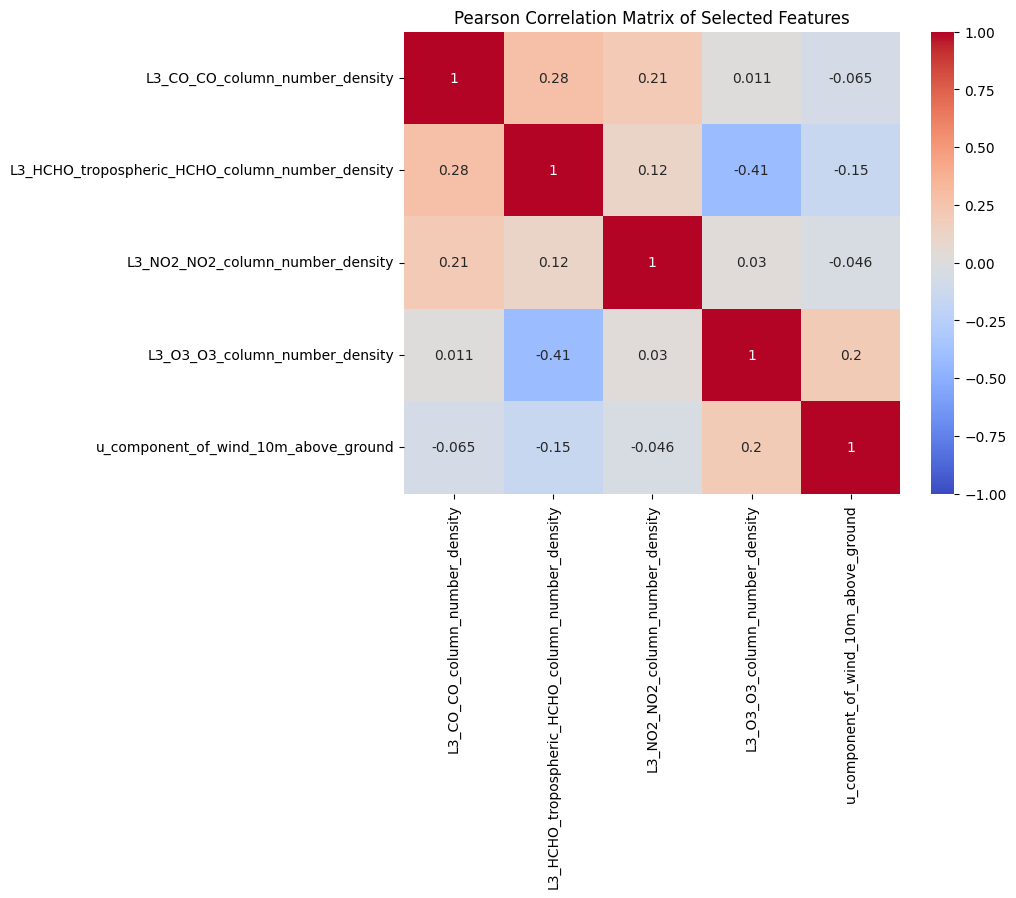

In [12]:
# Select the 5 features for testing independence
features_to_test = df_train_split[["L3_CO_CO_column_number_density", "L3_HCHO_tropospheric_HCHO_column_number_density",
                                   "L3_NO2_NO2_column_number_density", "L3_O3_O3_column_number_density", "u_component_of_wind_10m_above_ground"]]

# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = features_to_test.corr(method='pearson')

# Step 2: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 3: Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix of Selected Features')
plt.show()

These two features have a moderate positive correlation of 0.51. While not a severe case of multicollinearity, a correlation above 0.5 suggests that these features share some linear relationship. You may want to monitor this or consider using one of them, depending on your model's needs.



Comparing the Pearson

In [13]:
num_features = df_train_split[["L3_CO_CO_column_number_density", 
                               "L3_HCHO_tropospheric_HCHO_column_number_density",
                                "L3_NO2_NO2_column_number_density", 
                                "L3_O3_O3_column_number_density", 
                                "u_component_of_wind_10m_above_ground"]]

In [14]:
cat_features = df_train_split[["Place_ID"]]

Steps for Model
1. Standardize or Normalize numerical features
2. Baseline Linear regression
3. Handle Grouping by Location
        Include it as a categorical feature by encoding it.
        Train separate models for each location (if you want to analyze each group separately).
4. Train-Test Split:
Ensure that the train-test split is stratified by Location_ID, especially if your data has time-series characteristics or if locations should not overlap between training and test sets.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor





Change numerical variables

Impute mean on groupby

train test split

MAPE instead of MSE

Include Place_ID in the custom transformer for the imputation
Exclude Place_ID in the processing part because its not numerical

Updated Approach:
Modify the GroupImputer to ensure that Place_ID is passed separately.
Ensure the Place_ID is not scaled but is available for group-wise imputation

In [16]:
# Custom transformer for mean imputation per Place_ID
class MeanImputerPerLocation(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_features, group_by_col="Place_ID"):
        self.numerical_features = numerical_features
        self.group_by_col = group_by_col
    def fit(self, X, y=None):
        return self  # No fitting necessary for imputation logic
    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame
        for feature in self.numerical_features:
            X[feature] = X.groupby(self.group_by_col)[feature].transform(lambda x: x.fillna(x.mean()))
        return X
# Define the feature columns
numerical_features = [
    "L3_CO_CO_column_number_density",
    "L3_HCHO_tropospheric_HCHO_column_number_density",
    "L3_NO2_NO2_column_number_density",
    "L3_O3_O3_column_number_density",
    "u_component_of_wind_10m_above_ground"
]
categorical_features = ["Place_ID"]
# Define the preprocessing for numerical features: Standardization
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# Define the preprocessing for categorical features: One-hot encode Place_ID
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
# Define the full pipeline with the custom imputer, preprocessing, and regression model
model = Pipeline(steps=[
    ('mean_imputer', MeanImputerPerLocation(numerical_features=numerical_features)),
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Define the target variable
y_train = df_train_split["target"]
X_train = df_train_split[numerical_features + categorical_features]
y_test = df_test_split["target"]
X_test = df_test_split[numerical_features + categorical_features]
# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 0.612787799870785


In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV (removed 'normalize')
param_grid = {
    'regressor__fit_intercept': [True, False],  # Whether to calculate the intercept for the model
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best MAPE from GridSearchCV:", -grid_search.best_score_)

# Predict on test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the final model
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Test Mean Absolute Percentage Error (MAPE):", mape)


Best Parameters: {'regressor__fit_intercept': True}
Best MAPE from GridSearchCV: 0.9096316562148955
Test Mean Absolute Percentage Error (MAPE): 0.612787799870785


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# Custom transformer for mean imputation per Place_ID
class MeanImputerPerLocation(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_features, group_by_col="Place_ID"):
        self.numerical_features = numerical_features
        self.group_by_col = group_by_col
        
    def fit(self, X, y=None):
        return self  # No fitting necessary for imputation logic
    
    def transform(self, X):
        X = X.copy()  # Avoid modifying the original DataFrame
        for feature in self.numerical_features:
            X[feature] = X.groupby(self.group_by_col)[feature].transform(lambda x: x.fillna(x.mean()))
        return X

# Define the feature columns
numerical_features = [
    "L3_CO_CO_column_number_density",
    "L3_HCHO_tropospheric_HCHO_column_number_density",
    "L3_NO2_NO2_column_number_density",
    "L3_O3_O3_column_number_density",
    "u_component_of_wind_10m_above_ground"
]

categorical_features = ["Place_ID"]

# Define the preprocessing for numerical features: Standardization
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the preprocessing for categorical features: One-hot encode Place_ID
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the full pipeline with the custom imputer, preprocessing, and XGBRegressor model
model = Pipeline(steps=[
    ('mean_imputer', MeanImputerPerLocation(numerical_features=numerical_features)),
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))  # Using XGBRegressor here
])

# Define the target variablea
y_train = df_train_split["target"]
X_train = df_train_split[numerical_features + categorical_features]

y_test = df_test_split["target"]
X_test = df_test_split[numerical_features + categorical_features]

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Percentage Error (MAPE): 0.525768139190387


Question rakib: 
Random State in XGBoost: The random_state parameter in XGBRegressor is mostly used to control the randomness in subsampling, feature selection, or other random processes within the algorithm, and it shouldn't affect the order of your time series data itself. However, care needs to be taken when splitting the dataset.?

In [22]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 500],  # Number of boosting rounds
    'regressor__learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'regressor__max_depth': [3, 5, 7],  # Max depth of the trees
    'regressor__subsample': [0.8, 1.0],  # Fraction of samples used per tree
    'regressor__colsample_bytree': [0.8, 1.0],  # Fraction of features used per tree
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=5,  # Cross-validation folds (change later for time series cross-validation)
    scoring='neg_mean_absolute_percentage_error',
    verbose=1,
    n_jobs=-1  # Use all cores for parallel processing
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best MAPE from GridSearchCV:", -grid_search.best_score_)

# Predict on test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the final model
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Test Mean Absolute Percentage Error (MAPE):", mape)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 500, 'regressor__subsample': 0.8}
Best MAPE from GridSearchCV: 0.6666232409474256
Test Mean Absolute Percentage Error (MAPE): 0.5023039983980613


In [24]:
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the final model with the best parameters
mape = mean_absolute_percentage_error(y_test, y_pred)

# Show MAPE as a percentage
mape_percent = mape * 100
print(f"Test Mean Absolute Percentage Error (MAPE): {mape_percent:.2f}%")


Test Mean Absolute Percentage Error (MAPE): 50.23%


In [25]:
df_train_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,lag1
0,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,0.00839,22.546533,3.33043,-1.188108,0.000076,0.000197,-1.082553,0.01836,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.0152,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.00015,0.433957,0.00005,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,38.0


In [30]:
df_test_split.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,lag1


In [31]:
# Step 2: Create the 'lag1' column for df_test_split based on Place_ID
df_test_split['lag1'] = df_test_split.groupby('Place_ID')['target'].shift(1)

# Step 3: Remove any rows where 'lag1' is NaN (due to first occurrence in groups)
df_train_split = df_train_split.dropna(subset=['lag1'])
df_test_split = df_test_split.dropna(subset=['lag1'])

# Step 4: Define features and target
X_train_lag = df_train_split[['lag1', 'Place_ID']]  # Features for lag model
y_train_lag = df_train_split['target']  # Target variable

X_test_lag = df_test_split[['lag1', 'Place_ID']]  # Test features for lag model
y_test_lag = df_test_split['target']  # Test target variable

# Step 5: Define the preprocessing for categorical features (Place_ID)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for categorical features
preprocessor_lag = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['Place_ID'])
    ])

# Step 6: Define the model pipeline with preprocessing and regression model (you can use XGBRegressor or any other model)
lag_model = Pipeline(steps=[
    ('preprocessor', preprocessor_lag),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Step 7: Train the lag model
lag_model.fit(X_train_lag, y_train_lag)

# Step 8: Make predictions on the test data
y_pred_lag = lag_model.predict(X_test_lag)

# Step 9: Evaluate the model using Mean Absolute Percentage Error (MAPE) as percentage
mape_lag = mean_absolute_percentage_error(y_test_lag, y_pred_lag) * 100
print(f'Test Mean Absolute Percentage Error (MAPE) for lag model: {mape_lag:.2f}%')


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [32]:
# Group by 'Place_ID' and calculate the mean of 'target' for each group
grouped_means = df_train_split.groupby('Place_ID')['target'].mean()

# Display the result
print(grouped_means)

Place_ID
010Q650     36.455556
05EC30X     39.965116
0DPWHX8     80.322222
0GBXTHY     16.411111
0HYPV1N     89.122222
0I2XREH     26.770492
0KV6RJ1     71.066667
0MGEY68     32.966667
0O9R6AD     68.102273
0PP73FZ    111.288889
0RYZQUU    127.321839
0TFOCOS     48.640449
0TLH9UN     27.533333
11WPGRD    106.755556
168B2T2     88.144444
1GZGJPN     31.422222
1LC5FAK     34.166667
1PRBF5P     89.566667
1RYCZPT    113.600000
1SC5AWD     45.222222
1SKLTGJ     42.696629
1TE1HKJ     52.853333
1UEYEJQ     30.517241
1VN0K1S     34.794872
1WD100Y     57.377778
1X421B8     80.428571
1Y0S7TZ     87.577778
1YXF6T3     57.386364
1Z0FIHB     16.244444
1ZBVIMD     12.367816
215BUAP     88.133333
22D7H7I     30.750000
238N4KU     39.311111
28OSFYU    101.766667
2JZW8ZM     36.633333
2OR3E6X     28.966667
2S8UY1N    129.755556
2T41T7C     33.566667
2USU80I     44.655556
2WABRKJ     35.933333
35YN53B     77.000000
37VXILV    122.300000
3EJ33BJ     90.662921
3H1DEPM    120.144444
3HTVI1M     61.755556
3